# Final Project - Maintaining EV customers

---------------
## Context
---------------
This dataset presents results from a survey of FCV and BEV and compared the sociodeographic profile of FCV buyers vs BEV Households.  


-----------------
## Objective
-----------------
Based on the data we want to identify Current FCV & BEV Owners Demographics and see if there are any major differences between the two car owners.  

For our ML model we will attemp to predict based on the information if we can identify the customer as a FCV or BEV owner.  

-------------------------
## Data Dictionary
-------------------------

The dataset has the following information:
- When the customer submitted their data
- If they Previously Owned a PHEV, BEV, HEV, CNG
- Household Income
- Importance of Reducing Greenhouse Emissions
- Demographics of the customer current car (year, manufacture, model)
- Demographics on the customer's (home type, ownership of home,  education, gender, age, # of people in household)
- Demographics on customers car usage (longest trip, number of trips over 200 miles, one way commute distance, annual VMT vehicle miles traveled)
- If the customer is currently a FCV or BEV Current Owner


#### Acronyms used
- BEV: Battery Electric Vehicle
- FCV: Fuel Cell Vehicle (Hydrogen fuel cell vehicle)
- PHEV: Plug-in hybrid electric vehicle
- CNG: Compressed Natural Gas (everyday car)

### Import the necessary libraries or dependencies

In [1]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np

###  Read the Dataset 

In [2]:
#Import File
fcv_df = pd.read_excel('Resources/FCV&EVMT Data_6.18.19.xlsx')

In [3]:
fcv_df.head(5)

,id. Response ID,submitdate. Date submitted,Month Year[subm...Date submitted],Month[Month Yea...ate submitted]],Year[Month Year...ate submitted]],lastpage. Last page,Carmain,Previous PHEVs,Previous BEVs,Previous HEVs,...,Highest Level of Education,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy"
0,FCV_1_3,2017/06/02 11:30:57,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,1.0,0.0,0.0,...,3.0,483.14,0.0,0.01,2.0,65.0,0.0,2,14622.000000,0.0
1,FCV_1_4,2017/06/02 11:15:39,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,0.0,0.0,1.0,...,4.0,568.09,1.0,10.69,3.0,65.0,0.0,3,9197.142857,0.0
2,FCV_1_2,2017/06/02 10:51:59,06/2017,6.0,2017.0,42.0,2016 Toyota Mirai,1.0,1.0,0.0,...,4.0,398.57,0.0,9.39,5.0,55.0,1.0,4,15360.000000,0.0
3,FCV_1_5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
4,FCV_1_15,2017/06/02 19:35:59,06/2017,6.0,2017.0,42.0,2017 Toyota Mirai,1.0,0.0,0.0,...,2.0,255.16,0.0,17.63,2.0,55.0,0.0,3,5082.352941,0.0


## Descriptive Analysis/EDA

1. Check dimensions of the dataframe in terms of rows and columns
2. Check data types. Ensure your data types are correct. Refer data definitions to validate
3. If data types are not as per business definition, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Study correlation
7. Detect outliers

### Examine Dataset 

### The dimension of the `data` dataframe. (shape, r x c)

In [4]:
fcv_df.shape

(27021, 25)

#### Observations: 
The original dataset has 27,021 rows and 25 columns

### Data Types/Categorical vs. Numerical Columns

## Clean the dataset

In [5]:
# Update Column Names
fcv_df = fcv_df.rename(columns={'Month Year[subm...Date submitted]':'Month/Year Submitted',
                                'Month[Month Yea...ate submitted]]': 'Month Submitted',
                               'Year[Month Year...ate submitted]]':'Year Submitted',
                               'Annual VMT Estimate ':'Annual VMT Estimate'})

In [6]:
#Split Carmain into separate columns
fcv_df[['Model Year', 'Manufacturer', 'Model']] = fcv_df['Carmain'].str.split(' ', n=2, expand=True)

#Drop Carmain, & ID as not longer needed
fcv_df = fcv_df.drop(columns=['Carmain','id. Response ID','Month/Year Submitted','submitdate. Date submitted'],axis=1)

### Missing Values

**If we encounter with missing data, what we can do:**

* leave as is
* drop them with dropna()
* fill missing value with fillna()
* fill missing values with test statistics like mean

Mode Inputation
* Mode imputation means replacing missing values by the mode, or the most frequent- category value.


In [7]:
fcv_df.isnull().sum()

Month Submitted                                                                     6939
Year Submitted                                                                      6939
lastpage. Last page                                                                  996
Previous PHEVs                                                                     11077
Previous BEVs                                                                      11077
Previous HEVs                                                                      11077
Previous CNGs                                                                      11077
Household Income                                                                   10057
Importance of reducing greenhouse gas emissions (-3 not important, 3 important)     8519
Home ownership (own 1)                                                              8077
Home Type (detached 1)                                                              8022
Highest Level of Educ

In [8]:
percent_missing = fcv_df.isnull().sum() * 100 / len(fcv_df)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.style.format({'percent_missing':'{:.0f}%'})

,percent_missing
Month Submitted,26%
Year Submitted,26%
lastpage. Last page,4%
Previous PHEVs,41%
Previous BEVs,41%
Previous HEVs,41%
Previous CNGs,41%
Household Income,37%
"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",32%
Home ownership (own 1),30%


**Observations:**
Most of the missing data comes from `Previous PHEVs`,`Previous BEVs`, `Previous HEVs`, `Previous CNGs`. These features are missing 41% of their data. `FC, BEV Dummy` is missing 48% of it's data. This is an important feature we are measuring. So, to have this column missing almost half of it's data is a big deal.

In [9]:
fcv_df = fcv_df.dropna()

In [10]:
# Checking the count of unique values in each column
fcv_df.nunique()

Month Submitted                                                                       8
Year Submitted                                                                        3
lastpage. Last page                                                                   5
Previous PHEVs                                                                        2
Previous BEVs                                                                         2
Previous HEVs                                                                         2
Previous CNGs                                                                         2
Household Income                                                                     11
Importance of reducing greenhouse gas emissions (-3 not important, 3 important)     492
Home ownership (own 1)                                                                2
Home Type (detached 1)                                                                2
Highest Level of Education      

In [11]:
fcv_df.shape

(4709, 24)

#### Observations: 
After all rows with null values have been dropped the dataset has 4,709 rows and 26 columns

In [12]:
fcv_df.dtypes

Month Submitted                                                                    float64
Year Submitted                                                                     float64
lastpage. Last page                                                                float64
Previous PHEVs                                                                     float64
Previous BEVs                                                                      float64
Previous HEVs                                                                      float64
Previous CNGs                                                                      float64
Household Income                                                                   float64
Importance of reducing greenhouse gas emissions (-3 not important, 3 important)    float64
Home ownership (own 1)                                                             float64
Home Type (detached 1)                                                             float64

In [13]:
# Changing the data type of float type column to integer. 
fcv_df['Previous BEVs'] = fcv_df['Previous BEVs'].astype("int32")
fcv_df['Previous PHEVs'] = fcv_df['Previous PHEVs'].astype("int32")
fcv_df['Previous HEVs'] = fcv_df['Previous HEVs'].astype("int32")
fcv_df['Previous CNGs'] = fcv_df['Previous CNGs'].astype("int32")
fcv_df['Number of people in the household'] = fcv_df['Number of people in the household'].astype("int32")
fcv_df['FCV, BEV Dummy'] = fcv_df['FCV, BEV Dummy'].astype("int32")
fcv_df['Age'] = fcv_df['Age'].astype("int32")
fcv_df['Gender (Male 1)'] = fcv_df['Gender (Male 1)'].astype("int32")
fcv_df['Month Submitted'] = fcv_df['Month Submitted'].astype("int32")
fcv_df['Year Submitted'] = fcv_df['Year Submitted'].astype("int32")

## Summary Statistics

In [14]:
fcv_df.describe()

,Month Submitted,Year Submitted,lastpage. Last page,Previous PHEVs,Previous BEVs,Previous HEVs,Previous CNGs,Household Income,"Importance of reducing greenhouse gas emissions (-3 not important, 3 important)",Home ownership (own 1),...,Highest Level of Education,Longest trip in the last 12 months,Number of trips over 200 miles in the last 12 months,One-way commute distance,Number of people in the household,Age,Gender (Male 1),Number of vehicles in the household,Annual VMT Estimate,"FCV, BEV Dummy"
count,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.00000,...,4709.000000,4709.000000,4.709000e+03,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000,4709.000000
mean,6.489063,2016.004672,43.518794,0.099809,0.175409,0.217244,0.005946,223311.743470,1.715364,0.87938,...,3.406668,371.820822,4.720894e+04,18.578486,3.066893,49.643661,0.218518,2.571034,12547.143431,0.949034
std,1.927018,0.824680,1.128866,0.299777,0.380357,0.412414,0.076889,123880.139436,1.576913,0.32572,...,0.678945,340.614394,3.238360e+06,40.951945,1.246740,12.380423,0.413284,0.898820,14703.569790,0.219952
min,4.000000,2015.000000,3.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,-3.000000,0.00000,...,1.000000,0.210000,0.000000e+00,0.000000,1.000000,18.000000,0.000000,1.000000,-158400.000000,0.000000
25%,5.000000,2015.000000,43.000000,0.000000,0.000000,0.000000,0.000000,125000.000000,1.240000,1.00000,...,3.000000,171.580000,0.000000e+00,6.680000,2.000000,45.000000,0.000000,2.000000,7928.571429,1.000000
50%,6.000000,2016.000000,43.000000,0.000000,0.000000,0.000000,0.000000,175000.000000,2.550000,1.00000,...,4.000000,318.140000,0.000000e+00,14.000000,3.000000,45.000000,0.000000,2.000000,10838.709677,1.000000
75%,8.000000,2017.000000,45.000000,0.000000,0.000000,0.000000,0.000000,275000.000000,2.740000,1.00000,...,4.000000,437.340000,2.000000e+00,23.710000,4.000000,55.000000,0.000000,3.000000,14532.000000,1.000000
max,11.000000,2017.000000,45.000000,1.000000,1.000000,1.000000,1.000000,500000.000000,3.000000,1.00000,...,4.000000,4041.570000,2.222232e+08,2381.910000,12.000000,80.000000,1.000000,5.000000,342000.000000,1.000000


In [15]:
fcv_df.Manufacturer.value_counts()

Nissan           1401
Tesla            1292
Chevrolet         571
Toyota            350
Volkswagen        314
Fiat              276
BMW               152
Ford               98
Honda              64
FIAT               43
Kia                41
Smart              32
Mercedes-Benz      24
Hyundai            19
Mitsubishi          9
smart               3
tesla               3
Volkswagon          2
                    2
Mercedes            1
chevy               1
VW                  1
vw                  1
Tesler              1
Telsa               1
Hyundi              1
Chev                1
hyundai             1
nISSAN              1
MBW                 1
Nissa               1
Chevy               1
Name: Manufacturer, dtype: int64

In [16]:
brand_mapping = {
    'FIAT' : 'Fiat',
    'tesla' : 'Tesla', 
    'Volkswagon' : 'Volkswagen', 
    'Mercedes' : 'Mercedes-Benz',
    'chevy' : 'Chevrolet',
    'VW' : 'Volkswagen',
    'vw' : 'Volkswagen',
    'Tesler' : 'Tesla',
    'Chev' : 'Chevrolet',
    'Telsa' : 'Tesla',
    'hyundai' : 'Hyundai',
    'nISSAN' : 'Nissan',
    'MBW' : 'BMW',
    'Nissa' : 'Nissan',
    'Hyundi' : 'Hyundai',
    'Chevy' : 'Chevrolet',
    'smart' : 'Smart'
}

fcv_df['Manufacturer'] = fcv_df['Manufacturer'].replace(brand_mapping)
fcv_df.Manufacturer.value_counts()

Nissan           1403
Tesla            1297
Chevrolet         574
Toyota            350
Fiat              319
Volkswagen        318
BMW               153
Ford               98
Honda              64
Kia                41
Smart              35
Mercedes-Benz      25
Hyundai            21
Mitsubishi          9
                    2
Name: Manufacturer, dtype: int64

In [17]:
model_mapping = {
    '500E' : '500e',
    'Model X 60D' : 'Model X',
    'LEAF' : 'Leaf',
    'Tuscon' : 'Tucson',
    'Tucson FCV' : 'Tucson',
    'S 85' : 'Model S',
    'Tuscon fuel cell' : 'Tucson',
    'bolt' : 'Bolt EV',
    'Bolt' : 'Bolt EV',
    ' 75d' : 'Model S',
    'Model S P90D' : 'Model S',
    'S 90D' : 'Model S',
    'Tuscon FCV' : 'Tucson',
    ' Chevreolet Volt' : 'Volt',
    ' Tucson' : 'Tucson',
    'S 85 D' : 'Model S',
    'e golf' : 'e-Golf',
    ' E-Golf' : 'e-Golf',
    'eGolf' : 'e-Golf',
    'VW  e-Golf' : 'e-Golf',
    ' Leaf' : 'Leaf',
    'Model S P85D' : 'Model S',
    's' : 'Model S',
    'Tucson fuel cell' : 'Tucson',
    'model S' : 'Model S',
    'Tuscan' : 'Tucson',
    'S' : 'Model S',
    'tuscon' : 'Tucson',
    '85 S' : 'Model S',
    'Model S, P85' : 'Model S',
    ' Model S' : 'Model S',
    ' Tuscon' : 'Tucson',
    'Benz B Class Electric' : 'B250e',
    ' Model X' : 'Model X',
    'e-golf' : 'e-Golf',
    'Focus Electric' : 'Focus',
    'B-Class Electric Drive' : 'B250e',
    ' Chevrolet Volt' : 'Volt',
    'Spark' : 'Spark EV'
    
}

fcv_df['Model'] = fcv_df['Model'].replace(model_mapping)

In [18]:
fcv_df.Model.value_counts()

Leaf             1403
Model S          1133
Bolt EV           502
500e              319
e-Golf            319
Mirai             208
Model X           161
i3                153
RAV4 EV           142
Focus              97
Spark EV           72
Fit EV             50
Soul EV            41
fortwo             35
B250e              25
Tucson             21
Clarity            14
i-MiEV              9
Roadster            3
Fusion Energi       1
Volt                1
Name: Model, dtype: int64

Let's check the distribution and outliers for each column in the data.

In [19]:
# Uni-variate analysis of numerical variables allow us to study their central tendency and dispersion.
# function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
#
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x = feature, ax=ax_box2, showmeans=True, color='lightblue') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x = feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x = feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

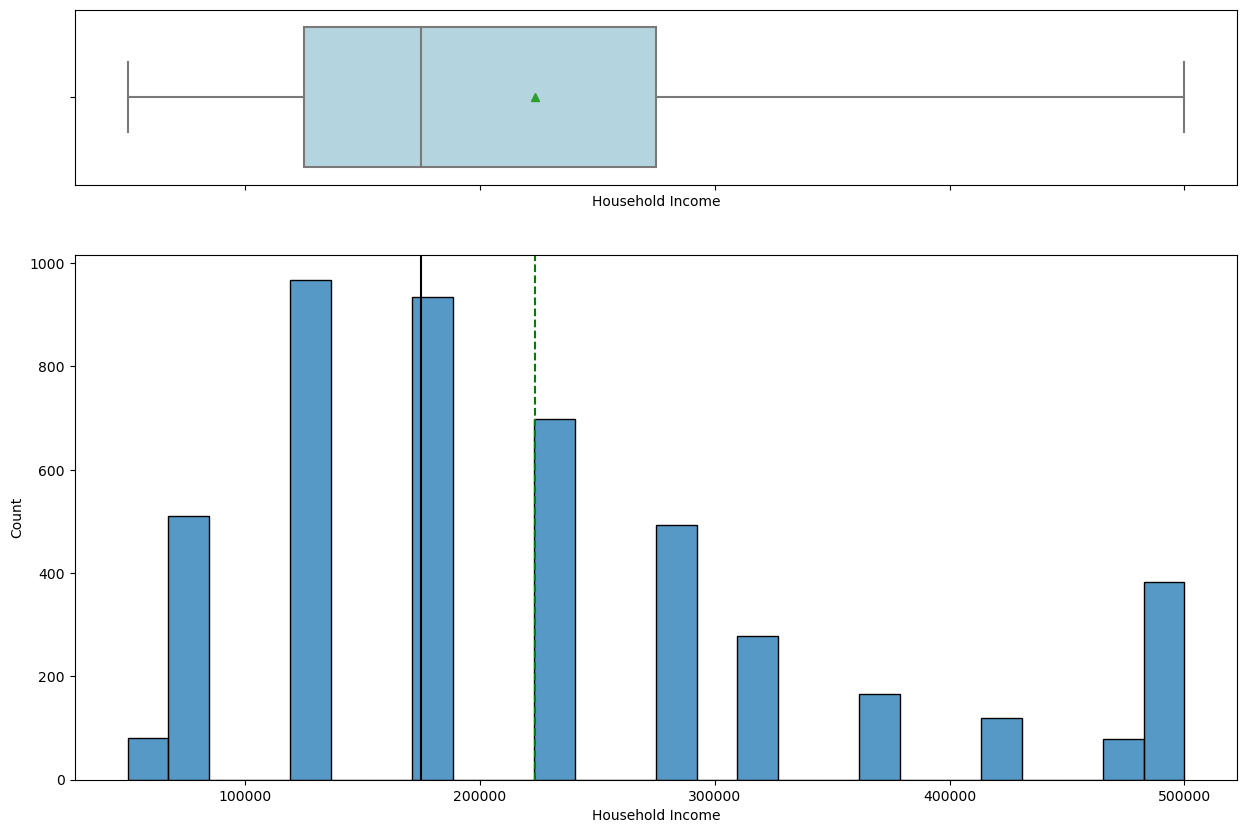

In [20]:
# Build the histogram boxplot for Income
histogram_boxplot(fcv_df['Household Income'])

In [21]:
fcv_df.columns

Index(['Month Submitted', 'Year Submitted', 'lastpage. Last page',
       'Previous PHEVs', 'Previous BEVs', 'Previous HEVs', 'Previous CNGs',
       'Household Income',
       'Importance of reducing greenhouse gas emissions (-3 not important, 3 important)',
       'Home ownership (own 1)', 'Home Type (detached 1)',
       'Highest Level of Education', 'Longest trip in the last 12 months',
       'Number of trips over 200 miles in the last 12 months',
       'One-way commute distance', 'Number of people in the household', 'Age',
       'Gender (Male 1)', 'Number of vehicles in the household',
       'Annual VMT Estimate', 'FCV, BEV Dummy', 'Model Year', 'Manufacturer',
       'Model'],
      dtype='object')

In [22]:
# Datasets
previous_car = fcv_df[['Previous PHEVs','Previous BEVs', 'Previous HEVs', 'Previous CNGs']]
household_demographics_df = fcv_df[['Household Income','Home ownership (own 1)', 'Home Type (detached 1)',
                                    'Highest Level of Education','Number of people in the household', 'Age','Gender (Male 1)',]]
commute_df = fcv_df[['Longest trip in the last 12 months','Number of trips over 200 miles in the last 12 months','One-way commute distance','Annual VMT Estimate']]
current_car_df = fcv_df[['Model Year', 'Manufacturer','Model']]

## Previous Car Owners

In [23]:
previous_car_sum = pd.DataFrame({'total': previous_car.sum()})
previous_car_sum = previous_car_sum.reset_index()
previous_car_sum = previous_car_sum.rename(columns={'index': 'Previous_Car'})
previous_car_sum

,Previous_Car,total
0,Previous PHEVs,470
1,Previous BEVs,826
2,Previous HEVs,1023
3,Previous CNGs,28


<BarContainer object of 4 artists>

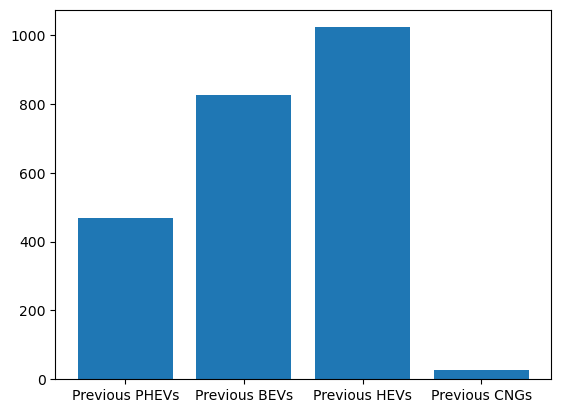

In [24]:
plt.bar(previous_car_sum['Previous_Car'],previous_car_sum['total'])

## Commute Box and Whisker

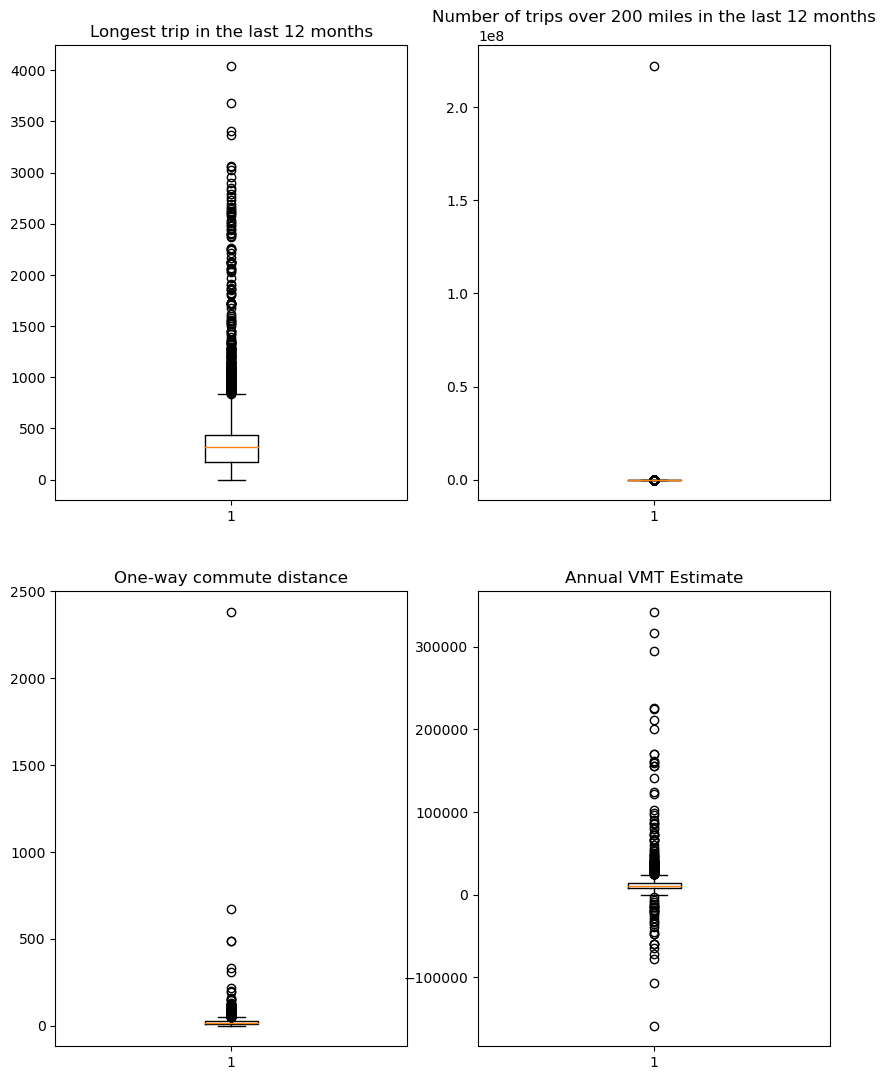

In [25]:
fig, axs =plt.subplots(2,2,figsize=(10, 13))

axs[0,0].boxplot(commute_df['Longest trip in the last 12 months'])
axs[0,0].set_title('Longest trip in the last 12 months')

axs[0,1].boxplot(commute_df['Number of trips over 200 miles in the last 12 months'])
axs[0,1].set_title('Number of trips over 200 miles in the last 12 months')

axs[1,0].boxplot(commute_df['One-way commute distance'])
axs[1,0].set_title('One-way commute distance')

axs[1,1].boxplot(commute_df['Annual VMT Estimate'])
axs[1,1].set_title('Annual VMT Estimate')

plt.show()

### Distribution Plot 

#### Observations: 


### Check for Max and Min Values

#### Observation:


### Examine the mean, median, and mode. Are the three measures of central tendency equal?
-- this will help describe the skewness/distribution of attributes

#### Observations: 

In [26]:
#Drop model year with 2-16
current_car_df = current_car_df.drop([16241])

In [27]:
#Sort by model year for plot
current_car_df = current_car_df.sort_values('Model Year', ascending=True)

### Pairplot for the variables. 

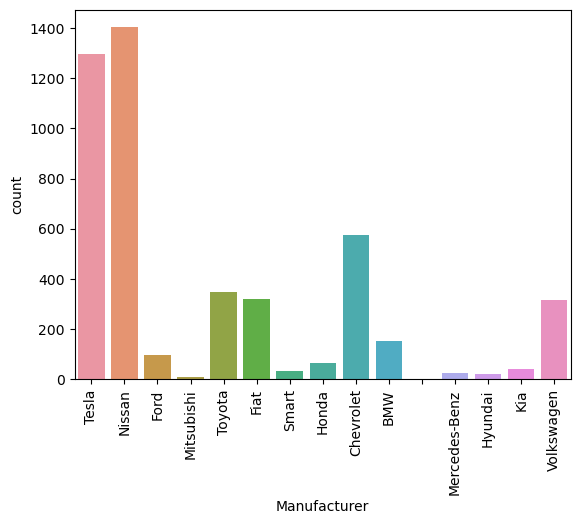

In [28]:
sns.countplot(current_car_df, x='Manufacturer')
plt.xticks(rotation=90)
plt.show()

#### Observations: 

In [29]:
corr = fcv_df.corr()

ax1 = sns.heatmap(fcv_df, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues', cbar=True)
plt.show()

ValueError: could not convert string to float: '2-16'

### Scatterplots 

#### Observations:

### Boxplots for Variables
Check the distribution and outliers for each column in the data.**

In [ ]:
#plt.boxplot(pima['Age'])
#plt.title('Boxplot of Age')
#plt.ylabel('Age')
#plt.show()

#### Observations:


### Histograms

In [ ]:
#plt.hist(pima[pima['Outcome'] == 1]['Age'], bins = 5)
#plt.title('Distribution of Age for Women who has Diabetes')
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.show()

#### Observations:

### The interquartile range of all the variables

In [ ]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

#### Observations: 

## Export of File to CSV for database

In [ ]:
fcv_df.to_csv('Exports/FCV_Dataset.csv')

### Visualize the Correlation Matrix.

* Correlation is a statistic that measures the degree to which two variables move in relation to each other. A positive correlation indicates
* the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable
* increases as the other decreases. Correction among multiple variables can be represented in the form of a matrix. This allows us to see which pairs have the high correlations.
* correlation Correlation is a mutual relationship or connection between two or more things. It takes a value between (+1) and (-1)
* The correlation between two independent events is zero, two events with zero correlations may not be independent.

In [ ]:
#plt.figure(figsize = (8, 8))
#sns.heatmap(corr_matrix, annot = True)

# Display the plot
#plt.show()

#### Observations: 


## Data Preprocessing for Modeling

* Renaming Columns
* Scaling/Normalizing
* Dropping unnecessary columns
* Hot encoding
* Imputing missing values with mode/median for columns
* Converting data types
* Format data types
* Apply get_dummies on the dataframe data

## Predictive Analysis/Building Models

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

## **Actionable Insights and Business Recommendations**